## STAC API

<img src="https://raw.githubusercontent.com/radiantearth/stac-site/master/images/logo/stac-030-long.png" width="30%"></img>

https://stacspec.org/


### Swisstopo STAC

https://www.geo.admin.ch/de/geo-dienstleistungen/geodienste/downloadienste/stac-api.html

Root: https://data.geo.admin.ch/api/stac/v0.9/

Siehe auch Katalog: https://stacindex.org/catalogs/datageoadminch#/


**API - Abfrageendpunkte**

| Endpoint | Description |
|----------|---------------|
| /        | Liefert die API-Capabilities |
| /conformance | Info über die Standards, mit denen die API konform ist |
| /collections | Verfügbare Datensätze auflisten (Collections) |
| /collections/{collectionId} | Liefert Metadaten der einzelnen Collection (JSON) |
| /collections/{collectionId}/items | Liefert die Items in der Collection (GeoJSON) |
| /collections/{collectionId}/items/{featureId} |iefert ein einzelnes Item (GeoJSON) |
| /search | Liefert eine Liste von Items, die den Abfrageparametern entsprechen. Ähnlich wie /collections/{collectionId}/items, führt jedoch die Filterung über alle Collections durch |




JSON enthält unter anderem bounding box immer in WGS84 (damit weltweit anwendbar), aber die Daten selber sind in LV95 für die Schweiz.

### PyStac Client

* eine **einfache** Implementation um swisstopo STAC zu lesen gibt es mit geopandas_stac.py, https://github.com/martinchristen/python-stac-api/

* In Zukunft werden voraussichtlich auch https://github.com/stac-utils/pystac-client und https://github.com/brazil-data-cube/stac.py den swisstopo STAC unterstützen, siehe: https://github.com/martinchristen/python-stac-api/issues/1


In [1]:
import geopandas as gpd
import shapely
import geopandas_stac as stac 

## Katalog anzeigen

In [2]:
df_collections = stac.getCollections(cache=False)

df_collections

,stac_version,id,title,description,summaries,extent,providers,license,created,updated,links,crs,itemType
0,0.9.0,ch.bazl.luftfahrtkarten-icao,Aeronautical Chart ICAO Switzerland 1:500'000,The official Aeronautical Chart ICAO 1:500'000...,"{'eo:gsd': [50.0], 'proj:epsg': [2056], 'geoad...","{'spatial': {'bbox': [[5.3385637, 45.5403468, ...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-06-29T13:15:26.512064Z,2021-07-06T11:31:18.685971Z,"[{'rel': 'self', 'href': 'https://data.geo.adm...",[http://www.opengis.net/def/crs/OGC/1.3/CRS84],Feature
1,0.9.0,ch.bazl.segelflugkarte,Glider Chart Switzerland 1:300'000,The Glider Map 1:300'000 is published in coope...,"{'eo:gsd': [30.0], 'proj:epsg': [2056], 'geoad...","{'spatial': {'bbox': [[5.8350985, 45.6662576, ...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-07-07T07:37:02.804312Z,2021-07-07T07:44:37.560757Z,"[{'rel': 'self', 'href': 'https://data.geo.adm...",[http://www.opengis.net/def/crs/OGC/1.3/CRS84],Feature
2,0.9.0,ch.swisstopo.geoidmodell-ch1903,Geoid model CHGeo2004 in CH1903,Swiss geoid model in the version of 2004 (CHGe...,{'proj:epsg': [2056]},"{'spatial': {'bbox': [[5.8282818, 45.6446766, ...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-06-29T13:57:48.808969Z,2021-07-12T11:41:32.214573Z,"[{'rel': 'self', 'href': 'https://data.geo.adm...",[http://www.opengis.net/def/crs/OGC/1.3/CRS84],Feature
3,0.9.0,ch.swisstopo.landeskarte-farbe-10,National Map 1:10'000 (color),"The 1:10,000 national map is swisstopo’s large...","{'eo:gsd': [0.5], 'proj:epsg': [2056], 'geoadm...","{'spatial': {'bbox': [[5.8828491, 45.804464, 1...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-02-11T12:16:13.231366Z,2021-08-06T11:18:21.378698Z,"[{'rel': 'self', 'href': 'https://data.geo.adm...",[http://www.opengis.net/def/crs/OGC/1.3/CRS84],Feature
4,0.9.0,ch.swisstopo.pixelkarte-farbe-pk100.noscale,National Map 1:100'000,"The National Map 1:100,000 is a supra-regional...","{'eo:gsd': [5.0], 'proj:epsg': [2056], 'geoadm...","{'spatial': {'bbox': [[5.8481166, 45.6908726, ...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-02-12T14:11:34.606807Z,2021-06-10T14:21:16.334325Z,"[{'rel': 'self', 'href': 'https://data.geo.adm...",[http://www.opengis.net/def/crs/OGC/1.3/CRS84],Feature
5,0.9.0,ch.swisstopo.pixelkarte-farbe-pk200.noscale,National Map 1:200'000,"The National Map 1:200,000 is a topographic ma...","{'eo:gsd': [10.0], 'proj:epsg': [2056], 'geoad...","{'spatial': {'bbox': [[5.6024076, 45.5039364, ...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-02-17T16:19:41.548907Z,2021-02-17T16:35:27.327876Z,"[{'rel': 'self', 'href': 'https://data.geo.adm...",[http://www.opengis.net/def/crs/OGC/1.3/CRS84],Feature
6,0.9.0,ch.swisstopo.pixelkarte-farbe-pk25.noscale,National Map 1:25'000,"The National Map 1:25,000 is a topographic map...","{'eo:gsd': [1.25], 'proj:epsg': [2056], 'geoad...","{'spatial': {'bbox': [[5.8735276, 45.8026814, ...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-02-12T14:11:04.628928Z,2021-08-12T13:14:24.665302Z,"[{'rel': 'self', 'href': 'https://data.geo.adm...",[http://www.opengis.net/def/crs/OGC/1.3/CRS84],Feature
7,0.9.0,ch.swisstopo.pixelkarte-farbe-pk50.noscale,National Map 1:50'000,"The National Map 1:50,000 is a topographic map...","{'eo:gsd': [2.5], 'proj:epsg': [2056], 'geoadm...","{'spatial': {'bbox': [[5.8672512, 45.6908726, ...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-02-12T14:09:05.522958Z,2021-06-08T12:33:47.307670Z,"[{'rel': 'self', 'href': 'https://data.geo.adm...",[http://www.opengis.net/def/crs/OGC/1.3/CRS84],Feature
8,0.9.0,ch.swisstopo.swissalti3d,swissALTI3D,swissALTI3D is an extremely precise digital el...,"{'eo:gsd': [0.5, 2.0], 'proj:epsg': [2056]}","{'spatial': {'bbox': [[5.9503666, 45.7213375, ...",[{'name': 'Federal Office of Topography - swis...,proprietary,2021-02-05T13:54:56.380277Z,2021-02-10T

In [3]:
def print_info(row):
    uid = row['id']
    print(uid)
    
r = df_collections.apply(print_info, axis=1)

ch.bazl.luftfahrtkarten-icao
ch.bazl.segelflugkarte
ch.swisstopo.geoidmodell-ch1903
ch.swisstopo.landeskarte-farbe-10
ch.swisstopo.pixelkarte-farbe-pk100.noscale
ch.swisstopo.pixelkarte-farbe-pk200.noscale
ch.swisstopo.pixelkarte-farbe-pk25.noscale
ch.swisstopo.pixelkarte-farbe-pk50.noscale
ch.swisstopo.swissalti3d
ch.swisstopo.swissbathy3d
ch.swisstopo.swissboundaries3d
ch.swisstopo.swissbuildings3d_2
ch.swisstopo.swissimage-dop10
ch.swisstopo.swissnames3d
ch.swisstopo.swisssurface3d
ch.swisstopo.swisssurface3d-raster
ch.swisstopo.swisstlm3d
ch.swisstopo.swisstlmregio


In [4]:
df = stac.getFeatures("ch.swisstopo.pixelkarte-farbe-pk50.noscale", cache=True)

Cache, weil die Daten stabil bleiben über eine gewisse Zeit.

In [5]:
len(df)

80

In [6]:
df.head()

,id,collection,type,stac_version,bbox,properties,links,assets,geometry
0,swiss-map-raster50_2007_285,ch.swisstopo.pixelkarte-farbe-pk50.noscale,Feature,0.9.0,"[8.1475759, 45.9196151, 8.6032493, 46.1392467]","{'datetime': '2007-01-01T00:00:00Z', 'created'...","[{'rel': 'self', 'href': 'https://data.geo.adm...",{'swiss-map-raster50_2007_285_kgrs_2.5_2056.ti...,"POLYGON ((8.15038 46.13925, 8.14758 45.92336, ..."
1,swiss-map-raster50_2012_224,ch.swisstopo.pixelkarte-farbe-pk50.noscale,Feature,0.9.0,"[7.7026763, 47.2186458, 8.1676858, 47.4364937]","{'datetime': '2012-01-01T00:00:00Z', 'created'...","[{'rel': 'self', 'href': 'https://data.geo.adm...",{'swiss-map-raster50_2012_224_kgrs_2.5_2056.ti...,"POLYGON ((7.70374 47.43649, 7.70268 47.22063, ..."
2,swiss-map-raster50_2012_234,ch.swisstopo.pixelkarte-farbe-pk50.noscale,Feature,0.9.0,"[7.7016173, 47.0027778, 8.1647434, 47.2206298]","{'datetime': '2012-01-01T00:00:00Z', 'created'...","[{'rel': 'self', 'href': 'https://data.geo.adm...",{'swiss-map-raster50_2012_234_kgrs_2.5_2056.ti...,"POLYGON ((7.70268 47.22063, 7.70162 47.00475, ..."
3,swiss-map-raster50_2012_244,ch.swisstopo.pixelkarte-farbe-pk50.noscale,Feature,0.9.0,"[7.7005668, 46.7869009, 8.1618247, 47.004754]","{'datetime': '2012-01-01T00:00:00Z', 'created'...","[{'rel': 'self', 'href': 'https://data.geo.adm...",{'swiss-map-raster50_2012_244_kgrs_2.5_2056.ti...,"POLYGON ((7.70162 47.00475, 7.70057 46.78887, ..."
4,swiss-map-raster50_2012_254,ch.swisstopo.pixelkarte-farbe-pk50.noscale,Feature,0.9.0,"[7.6995246, 46.5710181, 8.1589294, 46.7888692]","{'datetime': '2012-01-01T00:00:00Z', 'created'...","[{'rel': 'self', 'href': 'https://data.geo.adm...",{'swiss-map-raster50_2012_254_kgrs_2.5_2056.ti...,"POLYGON ((7.70057 46.78887, 7.69952 46.57298, ..."


<AxesSubplot:>

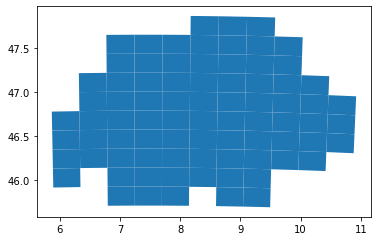

In [7]:
df.plot()

In [8]:
df_assets = stac.genAssets(df)
len(df_assets)

240

240 Datensets in 80 Kacheln (3 verschiedene Datentypen je)

In [9]:
df_assets.head()

,name,type,bbox,created,updated,href,proj,gsd,variant,checksum,geometry
0,swiss-map-raster50_2007_285_kgrs_2.5_2056.tif,image/tiff; application=geotiff; profile=cloud...,"[8.1475759, 45.9196151, 8.6032493, 46.1392467]",2021-02-17T13:31:07.118238Z,2021-04-12T06:28:30.642165Z,https://data.geo.admin.ch/ch.swisstopo.pixelka...,2056,2.5,kgrs,122095E37F7F99F5ECE5FE38E4ED4E95DF15075CF50B50...,"POLYGON ((8.15038 46.13925, 8.14758 45.92336, ..."
1,swiss-map-raster50_2007_285_komb_2.5_2056.tif,image/tiff; application=geotiff; profile=cloud...,"[8.1475759, 45.9196151, 8.6032493, 46.1392467]",2021-02-17T13:56:46.644173Z,2021-04-12T06:29:34.610154Z,https://data.geo.admin.ch/ch.swisstopo.pixelka...,2056,2.5,komb,12208E111623C7FD30B9B285438AB4CC2C06957E033BE0...,"POLYGON ((8.15038 46.13925, 8.14758 45.92336, ..."
2,swiss-map-raster50_2007_285_krel_2.5_2056.tif,image/tiff; application=geotiff; profile=cloud...,"[8.1475759, 45.9196151, 8.6032493, 46.1392467]",2021-02-17T13:44:25.152892Z,2021-04-12T06:32:50.381427Z,https://data.geo.admin.ch/ch.swisstopo.pixelka...,2056,2.5,krel,1220398A87328FE21CF5069D4EE52829BF8D31E4A48B01...,"POLYGON ((8.15038 46.13925, 8.14758 45.92336, ..."
3,swiss-map-raster50_2012_224_kgrs_2.5_2056.tif,image/tiff; application=geotiff; profile=cloud...,"[7.7026763, 47.2186458, 8.1676858, 47.4364937]",2021-02-17T13:31:12.196493Z,2021-02-17T13:31:12.196510Z,https://data.geo.admin.ch/ch.swisstopo.pixelka...,2056,2.5,kgrs,12209DE34C794E801502A7013F966B3261462E1BD7155F...,"POLYGON ((7.70374 47.43649, 7.70268 47.22063, ..."
4,swiss-map-raster50_2012_224_komb_2.5_2056.tif,image/tiff; application=geotiff; profile=cloud...,"[7.7026763, 47.2186458, 8.1676858, 47.4364937]",2021-02-17T13:57:08.113787Z,2021-02-17T13:57:08.113805Z,https://data.geo.admin.ch/ch.swisstopo.pixelka...,2056,2.5,komb,122029879E4AF587FB546359AF256E771E96D35EFA697D...,"POLYGON ((7.70374 47.43649, 7.70268 47.22063, ..."


**Varianten** siehe auch: https://www.swisstopo.admin.ch/content/swisstopo-internet/en/swisstopo/documents.download/swisstopo-internet/en/documents/karto-documents/shop/SMRProduktdokumentation_D.pdf

* KREL Farbkombination mit Relief (RGB)
* KOMB Farbkombination ohne Relief (indizierte Farben)
* KGRS Graustufenkombination ohne Relief (indizierte Farben)
* EE Einzelebenen (Bitmap, RELI und GTON als Graustufen)


Siehe auch Webinterface: https://www.swisstopo.admin.ch/de/geodata/maps/smr/smr50.html
        

In [10]:
list(df_assets['variant'].unique())

['kgrs', 'komb', 'krel']

**Auflösung**

Nur die Variante mit 2.5m pro Pixel

In [11]:
list(df_assets['gsd'].unique())

[2.5]

**CRS**

Nur EPSG Code 2056 (LV95)

In [12]:
list(df_assets['proj'].unique())

[2056]

**Fileformat** / **Filetype**

In [13]:
list(df_assets['type'].unique())

['image/tiff; application=geotiff; profile=cloud-optimized']

**Schlussauswahl**

Wir können also z.B. Dataframes für jede Variante erstellen:

In [14]:
df_kgrs = df_assets.query('variant == "kgrs"') # "Farbe mit Relief"
df_krel = df_assets.query('variant == "krel"') # "Farbe ohne Relief"
df_komb = df_assets.query('variant == "komb"') # "Graustufen ohne Relief"

In [15]:
df_krel.head(3)

,name,type,bbox,created,updated,href,proj,gsd,variant,checksum,geometry
2,swiss-map-raster50_2007_285_krel_2.5_2056.tif,image/tiff; application=geotiff; profile=cloud...,"[8.1475759, 45.9196151, 8.6032493, 46.1392467]",2021-02-17T13:44:25.152892Z,2021-04-12T06:32:50.381427Z,https://data.geo.admin.ch/ch.swisstopo.pixelka...,2056,2.5,krel,1220398A87328FE21CF5069D4EE52829BF8D31E4A48B01...,"POLYGON ((8.15038 46.13925, 8.14758 45.92336, ..."
5,swiss-map-raster50_2012_224_krel_2.5_2056.tif,image/tiff; application=geotiff; profile=cloud...,"[7.7026763, 47.2186458, 8.1676858, 47.4364937]",2021-02-17T13:44:17.079676Z,2021-02-17T13:44:17.079695Z,https://data.geo.admin.ch/ch.swisstopo.pixelka...,2056,2.5,krel,1220EE1D108387758F2876342F40F2A8DF28AE083A496D...,"POLYGON ((7.70374 47.43649, 7.70268 47.22063, ..."
8,swiss-map-raster50_2012_234_krel_2.5_2056.tif,image/tiff; application=geotiff; profile=cloud...,"[7.7016173, 47.0027778, 8.1647434, 47.2206298]",2021-02-17T13:44:19.448489Z,2021-02-17T13:44:19.448507Z,https://data.geo.admin.ch/ch.swisstopo.pixelka...,2056,2.5,krel,1220759272439B92B563CC454253A74A466068C8E86198...,"POLYGON ((7.70268 47.22063, 7.70162 47.00475, ..."


nun müsste man noch die URL auslesen, dies ist in der Hilfsfunktion getUrlList(df)

### Nochmals der gesamte Weg (vereinfacht)


* ``stac.getCollectionList(cache=True)``
* ``df = stac.getAssets("ASSETNAME")``
* Eindeutigkeit Abfragen (z.B. Auflösung, Variante)
* ``urls = stac.getUrlList(df_krel)``


In [16]:
stac.getCollectionList(cache=True)

['ch.bazl.luftfahrtkarten-icao',
 'ch.bazl.segelflugkarte',
 'ch.swisstopo.geoidmodell-ch1903',
 'ch.swisstopo.landeskarte-farbe-10',
 'ch.swisstopo.pixelkarte-farbe-pk100.noscale',
 'ch.swisstopo.pixelkarte-farbe-pk200.noscale',
 'ch.swisstopo.pixelkarte-farbe-pk25.noscale',
 'ch.swisstopo.pixelkarte-farbe-pk50.noscale',
 'ch.swisstopo.swissalti3d',
 'ch.swisstopo.swissbathy3d',
 'ch.swisstopo.swissboundaries3d',
 'ch.swisstopo.swissbuildings3d_2',
 'ch.swisstopo.swissimage-dop10',
 'ch.swisstopo.swissnames3d',
 'ch.swisstopo.swisssurface3d',
 'ch.swisstopo.swisssurface3d-raster',
 'ch.swisstopo.swisstlm3d',
 'ch.swisstopo.swisstlmregio']

In [17]:
df = stac.getAssets("ch.swisstopo.pixelkarte-farbe-pk50.noscale")

... hier müsste man noch wissen, was eindeutig ist ...

In [18]:
df_kgrs = df.query('variant == "kgrs"') # Farbkombination mit Relief (RGB)
df_krel = df.query('variant == "krel"') # Farbkombination ohne Relief (indizierte Farben)
df_komb = df.query('variant == "komb"') # Graustufenkombination ohne Relief (indizierte Farben)

In [19]:
urls = stac.getUrlList(df_krel)

Wir könnten jetzt alles herunterladen...

In [20]:
urls[0:5]  # Die ersten 5 in der liste

['https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2007_285/swiss-map-raster50_2007_285_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_224/swiss-map-raster50_2012_224_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_234/swiss-map-raster50_2012_234_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_244/swiss-map-raster50_2012_244_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_254/swiss-map-raster50_2012_254_krel_2.5_2056.tif']

### Räumliche Abfragen

Im Webinterface der Swisstopo haben wir ja folgende Auswahlmöglichkeiten gehabt:

* Rechteck
* Polygon
* Klicken
* Kanton
* Gemeinde
* Ganzer Datensatz

Im Prinzip haben wir jetzt den **ganzen Datensatz**, also wir können recht einfach ein CSV selbst erstellen.


#### Punkt

In [21]:
# Bundeshaus:
lat = 46.94653998135123
lng = 7.444120726365559

In [22]:
point = shapely.geometry.Point(lng, lat)
bundeshaus_punkt = gpd.GeoDataFrame(geometry=gpd.GeoSeries(point, crs="epsg:4326"))

In [23]:
bundeshaus_punkt

,geometry
0,POINT (7.44412 46.94654)


In [25]:
# siehe: https://geopandas.org/gallery/spatial_joins.html
# spatial join: Kachel, wo das Bundeshaus enthalten ist
df_krel_bundeshaus = gpd.sjoin(df_krel, bundeshaus_punkt, op='contains')

In [26]:
urls = stac.getUrlList(df_krel_bundeshaus)
urls

['https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2016_243/swiss-map-raster50_2016_243_krel_2.5_2056.tif']

#### Polygon

Polygon: Bern, Olten, Luzern, Interlaken

In [27]:
s = "POLYGON((7.45147705078125 46.95401192579361,7.84698486328125 46.677710064644344,8.35235595703125 47.00647991252098,7.915649414062499 47.336961408985005,7.45147705078125 46.95401192579361))"

In [28]:
import shapely.wkt

polygon = shapely.wkt.loads(s)
poly_gpd = gpd.GeoDataFrame(geometry=gpd.GeoSeries(polygon, crs="epsg:4326"))

In [29]:
# siehe: https://geopandas.org/gallery/spatial_joins.html
# intersects: Schnittmenge
df_polygon = gpd.sjoin(df_krel, poly_gpd, op='intersects')

In [30]:
urls = stac.getUrlList(df_polygon)
urls

['https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_224/swiss-map-raster50_2012_224_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_234/swiss-map-raster50_2012_234_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_244/swiss-map-raster50_2012_244_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_254/swiss-map-raster50_2012_254_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2013_235/swiss-map-raster50_2013_235_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2014_245/swiss-map-raster50_2014_245_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2016_243/swiss-map-raster50_

#### Kanton, Gemeinde

ist analog Polygon

Für solche Anwendungen reichen in der Regel generalisierte Polygone

In [31]:
kantone = gpd.read_file("daten/gemeindegrenzen/ggg_2021-LV95/shp/g1k21.shp", encoding="utf-8")
kantone = kantone[['KTNR','KTNAME','AREA_HA', 'geometry']]
kantone.head()

,KTNR,KTNAME,AREA_HA,geometry
0,1,Zürich,172894,"POLYGON ((2692443.000 1281183.000, 2692994.000..."
1,2,Bern / Berne,595951,"MULTIPOLYGON (((2573533.000 1194765.000, 25740..."
2,3,Luzern,149353,"POLYGON ((2662029.000 1237691.000, 2662264.000..."
3,4,Uri,107654,"POLYGON ((2688457.000 1203340.000, 2688740.000..."
4,5,Schwyz,90788,"POLYGON ((2704723.000 1229925.000, 2706210.000..."


In [33]:
# !!! Umwandlung !!!
kantone = kantone.to_crs("EPSG:4326")
kantone.head()

,KTNR,KTNAME,AREA_HA,geometry
0,1,Zürich,172894,"POLYGON ((8.66961 47.67475, 8.67687 47.67182, ..."
1,2,Bern / Berne,595951,"MULTIPOLYGON (((7.09127 46.90346, 7.09742 46.8..."
2,3,Luzern,149353,"POLYGON ((8.25860 47.28720, 8.26163 47.28254, ..."
3,4,Uri,107654,"POLYGON ((8.60118 46.97524, 8.60439 46.95198, ..."
4,5,Schwyz,90788,"POLYGON ((8.82107 47.21196, 8.84060 47.20808, ..."


In [34]:
poly_gpd = kantone.query('KTNR == 2')
poly_gpd

,KTNR,KTNAME,AREA_HA,geometry
1,2,Bern / Berne,595951,"MULTIPOLYGON (((7.09127 46.90346, 7.09742 46.8..."


In [35]:
df_daten_kantone = gpd.sjoin(df_krel, poly_gpd, op='intersects')

In [36]:
urls = stac.getUrlList(df_daten_kantone)
urls

['https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_224/swiss-map-raster50_2012_224_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_234/swiss-map-raster50_2012_234_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_244/swiss-map-raster50_2012_244_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2012_254/swiss-map-raster50_2012_254_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2014_245/swiss-map-raster50_2014_245_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2016_242/swiss-map-raster50_2016_242_krel_2.5_2056.tif',
 'https://data.geo.admin.ch/ch.swisstopo.pixelkarte-farbe-pk50.noscale/swiss-map-raster50_2016_243/swiss-map-raster50_